# Module 3: Homework

In [1]:
!wget https://archive.ics.uci.edu/static/public/222/bank+marketing.zip

--2025-05-22 14:01:18--  https://archive.ics.uci.edu/static/public/222/bank+marketing.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘bank+marketing.zip’

bank+marketing.zip      [   <=>              ] 999.85K  1.95MB/s    in 0.5s    

2025-05-22 14:01:19 (1.95 MB/s) - ‘bank+marketing.zip’ saved [1023843]



In [1]:
### Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


The dataset we have is about the bank's decision to offer loans to an individual based on certain characteristics. In the course of this analysis, we will train a logistic regression model that serves to automatize this prediction.


In [2]:
df = pd.read_csv('bank-full.csv',sep = ';')
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [70]:
df.shape

(45211, 15)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   balance    45211 non-null  int64 
 5   housing    45211 non-null  object
 6   contact    45211 non-null  object
 7   day        45211 non-null  int64 
 8   month      45211 non-null  object
 9   duration   45211 non-null  int64 
 10  campaign   45211 non-null  int64 
 11  pdays      45211 non-null  int64 
 12  previous   45211 non-null  int64 
 13  poutcome   45211 non-null  object
 14  y          45211 non-null  int64 
dtypes: int64(8), object(7)
memory usage: 5.2+ MB


In [3]:
total = df.columns

In [4]:
#### Data preparation
interested = ['age', 'job', 'marital', 'education', 'balance', 'housing', 'contact', 'day', 'month', 
                'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']

df = df[interested]

In [5]:
cutout = set(total) - set(interested)
cutout

{'default', 'loan'}

In [6]:
df.head(10)


,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,231,yes,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,447,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,2,yes,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,121,yes,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,593,yes,unknown,5,may,55,1,-1,0,unknown,no


In [7]:
len(df)

45211

In [8]:
## what's the data type

df.dtypes

age           int64
job          object
marital      object
education    object
balance       int64
housing      object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [9]:
numerical = ['age', 'day', 'balance', 'duration', 'campaign', 'pdays', 'previous']
categorical = list(set(df.columns) - set(numerical) - set('y'))
target_ = 'y'


In [10]:
categorical

['month', 'job', 'education', 'marital', 'contact', 'housing', 'poutcome']

In [11]:
## are there any null values:
df.isnull( ).sum() #no missing values

age          0
job          0
marital      0
education    0
balance      0
housing      0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [12]:
df.contact.unique() #still categorical

array(['unknown', 'cellular', 'telephone'], dtype=object)

## Question 1:

In [13]:
df['education'].value_counts()


education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64

The most frequent observation for the column education is ```secondary``` with a frequency of 23202 out of  45211 samples

## Question 2:

In [73]:
df[numerical].describe()

,age,day,balance,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,15.806419,1362.272058,258.163080,2.763841,40.197828,0.580323
std,10.618762,8.322476,3044.765829,257.527812,3.098021,100.128746,2.303441
min,18.000000,1.000000,-8019.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,8.000000,72.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,16.000000,448.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,21.000000,1428.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,31.000000,102127.000000,4918.000000,63.000000,871.000000,275.000000


In [14]:
## we want the correlation matrix for the numerical features of the 

corr_matrix = df[numerical].corr()

In [15]:
corr_matrix.round(2)

,age,day,balance,duration,campaign,pdays,previous
age,1.00,-0.01,0.10,-0.00,0.00,-0.02,0.00
day,-0.01,1.00,0.00,-0.03,0.16,-0.09,-0.05
balance,0.10,0.00,1.00,0.02,-0.01,0.00,0.02
duration,-0.00,-0.03,0.02,1.00,-0.08,-0.00,0.00
campaign,0.00,0.16,-0.01,-0.08,1.00,-0.09,-0.03
pdays,-0.02,-0.09,0.00,-0.00,-0.09,1.00,0.45
previous,0.00,-0.05,0.02,0.00,-0.03,0.45,1.00


<Axes: >

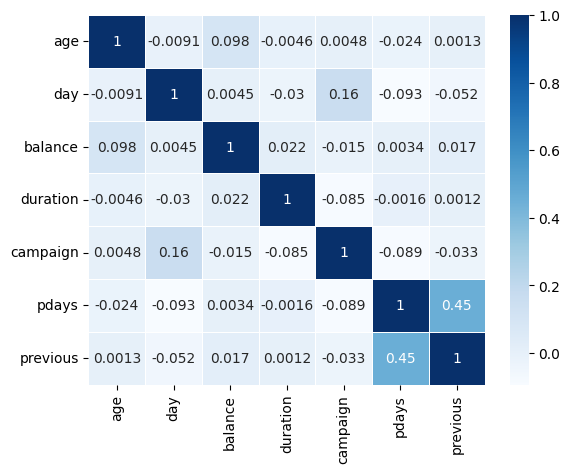

In [ ]:

sns.heatmap(corr_matrix, annot = True, linewidths = 0.5, cmap = 'Blues')

In [76]:


corr_matrix.unstack().sort_values(ascending=False)



age       age         1.000000
day       day         1.000000
balance   balance     1.000000
campaign  campaign    1.000000
duration  duration    1.000000
pdays     pdays       1.000000
previous  previous    1.000000
pdays     previous    0.454820
previous  pdays       0.454820
day       campaign    0.162490
campaign  day         0.162490
balance   age         0.097783
age       balance     0.097783
balance   duration    0.021560
duration  balance     0.021560
balance   previous    0.016674
previous  balance     0.016674
age       campaign    0.004760
campaign  age         0.004760
balance   day         0.004503
day       balance     0.004503
pdays     balance     0.003435
balance   pdays       0.003435
previous  age         0.001288
age       previous    0.001288
previous  duration    0.001203
duration  previous    0.001203
          pdays      -0.001565
pdays     duration   -0.001565
age       duration   -0.004648
duration  age        -0.004648
day       age        -0.009120
age     

The two features that have the biggest correlation is 
1. previous to pdays
2. campaian to days

In [17]:
df.y.unique()

array(['no', 'yes'], dtype=object)

In [18]:
## Target Encoding

df.y = (df.y == 'yes').astype(int)
df.y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64

In [19]:
## Splitting the data
from sklearn.model_selection import train_test_split

df_fulltrain, df_test = train_test_split(df, test_size=0.2, random_state=42)


In [20]:
df_train, df_val = train_test_split(df_fulltrain, test_size=0.25)

In [21]:

len(df_train)/len(df) , len(df_val)/len(df), len(df_test)/len(df)

(0.5999867288934109, 0.19999557629780362, 0.20001769480878548)

In [77]:
assert len(df) == (len(df_train) + len(df_val) + len(df_test))

In [22]:
## Reset the index
df_fulltrain = df_fulltrain.reset_index(drop=True)
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop= True)



In [23]:
# extract the target variable out
y_fulltrain = df_fulltrain.y.values
y_train = df_train.y.values
y_val = df_val.y.values
y_test = df_test.y.values

#del the columns
del df_fulltrain['y']
del df_train['y']
del df_val['y']
del df_test['y']

In [24]:

df_fulltrain.head()

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome
0,41,blue-collar,married,primary,849,yes,unknown,15,may,72,1,-1,0,unknown
1,49,technician,married,primary,1415,yes,cellular,30,jul,269,2,-1,0,unknown
2,42,admin.,married,secondary,3842,no,cellular,31,jul,130,4,-1,0,unknown
3,37,management,single,tertiary,-119,yes,unknown,11,jun,375,11,-1,0,unknown
4,56,blue-collar,married,primary,3498,no,cellular,15,apr,264,2,-1,0,unknown


In [25]:
y_fulltrain

array([0, 0, 0, ..., 0, 0, 0], shape=(36168,))

## Question 3: 

In [26]:
categorical

['month', 'job', 'education', 'marital', 'contact', 'housing', 'poutcome']

In [79]:
# Mutual information score between y and other categorical variables in the data set

from sklearn.metrics import mutual_info_score

scores = mutual_info_score(y_train, df_train.housing)
scores

np.float64(0.009337512667482173)

In [82]:
def mutual_info_y_score(series):
    return mutual_info_score(series, y_fulltrain)

mi = df_fulltrain[categorical].apply(mutual_info_y_score).round(5)
mi = mi.sort_values(ascending = False).to_frame(name = "MI")
mi

,MI
poutcome,0.02926
month,0.02477
contact,0.01416
housing,0.00980
job,0.00777
education,0.00246
marital,0.00202


The categorical variable that has the most mutual information with the target variable y is ``poutcome`` followed by ``month`` which makes intuitive sense. 

## Question 4: 


In [28]:
# Now let's train a logistic Regression 
# Before feeding our data into the model, we have to transform our categorical variables into vectors by one-hot encoding.

In [29]:
## One-hot-encoding

from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse=False)

In [30]:
df_train_dicts = df_train[categorical].to_dict(orient = 'records')
df_train_dicts[0]

{'month': 'aug',
 'job': 'technician',
 'education': 'tertiary',
 'marital': 'single',
 'contact': 'cellular',
 'housing': 'no',
 'poutcome': 'unknown'}

In [31]:
dv.fit(df_train_dicts)
dv

DictVectorizer(sparse=False)

In [32]:
dv.get_feature_names_out()

array(['contact=cellular', 'contact=telephone', 'contact=unknown',
       'education=primary', 'education=secondary', 'education=tertiary',
       'education=unknown', 'housing=no', 'housing=yes', 'job=admin.',
       'job=blue-collar', 'job=entrepreneur', 'job=housemaid',
       'job=management', 'job=retired', 'job=self-employed',
       'job=services', 'job=student', 'job=technician', 'job=unemployed',
       'job=unknown', 'marital=divorced', 'marital=married',
       'marital=single', 'month=apr', 'month=aug', 'month=dec',
       'month=feb', 'month=jan', 'month=jul', 'month=jun', 'month=mar',
       'month=may', 'month=nov', 'month=oct', 'month=sep',
       'poutcome=failure', 'poutcome=other', 'poutcome=success',
       'poutcome=unknown'], dtype=object)

In [33]:
X_train_cat = dv.transform(df_train_dicts)
X_train_cat

array([[1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.]], shape=(27126, 40))

In [34]:
X_train = np.column_stack([df_train[numerical].values, X_train_cat])
X_train.shape, y_train.shape

((27126, 47), (27126,))

In [35]:
## So let's train the model now:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver = 'liblinear', C= 1.0, max_iter=1000, random_state = 42)
model

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [36]:
model.fit(X_train, y_train)
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 1000,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [37]:
## weight paramters
w0 = model.intercept_[0]
print(w0)
w1 = model.coef_[0]
print(w1)

-1.0263043288130365
[ 1.43911388e-03  7.39174775e-03  1.85911438e-05  4.16401738e-03
 -7.80801416e-02 -2.87229687e-04  3.32047026e-03  2.60369388e-01
  1.32799193e-01 -1.41947291e+00 -4.92990721e-01 -2.02176547e-01
 -1.09541855e-01 -2.21595205e-01 -1.99105182e-01 -8.27199147e-01
  3.73139200e-02 -2.23126855e-01 -3.98578358e-01 -2.83085251e-01
 -7.25253603e-02  2.30240665e-01 -2.45625754e-01 -1.31366194e-01
  4.06356139e-01 -1.11331152e-01 -1.17736298e-01 -1.16839830e-01
 -3.19765652e-01 -5.11384015e-01 -1.95154661e-01 -4.72082027e-02
 -7.07124948e-01  5.19866221e-01 -2.42272179e-01 -1.27045151e+00
 -9.66090906e-01  3.06066997e-01  1.36970831e+00 -5.82130558e-01
 -9.67060222e-01  8.27144026e-01  7.33248644e-01 -8.32831004e-01
 -6.27984177e-01  1.43010504e+00 -9.95594186e-01]


In [38]:
## Let's check the accuracy
##Let's construct the validation data set 

X_val_cat = dv.transform(df_val[categorical].to_dict(orient = 'records'))
X_val_cat.shape

(9042, 40)

In [39]:
X_val = np.column_stack([df_val[numerical].values, X_val_cat])
X_val.shape, y_val.shape

((9042, 47), (9042,))

In [40]:
y_preds = model.predict(X_val)
print(y_preds)
y_predict_proba = model.predict_proba(X_val)[:, 1]
print(y_predict_proba)
#print(y_val)

[0 0 0 ... 0 0 0]
[0.01845275 0.24743199 0.06139829 ... 0.01863343 0.05014709 0.02242396]


In [47]:
## Accuracy

base_score = (y_val == y_preds).mean()
base_score

np.float64(0.900575094005751)

## Question 5:

What's the least useful feature using the ```feature elimation``` technique?

In [62]:
def training_workflow(categorical, numerical_features=None):
    """
    Train and evaluate a model with given categorical and numerical features
    
    Parameters:
    categorical: list of categorical features to use
    numerical_features: list of numerical features to use (if None, use all numerical features)
    """
    if numerical_features is None:
        numerical_features = numerical
        
    # Process categorical features
    dv_inside = DictVectorizer(sparse=False)
    dicts_inside = df_train[categorical].to_dict(orient='records')
    dv_inside.fit(dicts_inside)
    X_cat = dv_inside.transform(dicts_inside)
    
    # Process numerical features
    X_num = df_train[numerical_features].values
    X_train_inside = np.column_stack([X_num, X_cat])

    # Prepare validation data
    X_cat_val = dv_inside.transform(df_val[categorical].to_dict(orient='records'))
    X_num_val = df_val[numerical_features].values
    X_val_inside = np.column_stack([X_num_val, X_cat_val])

    # Train model
    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
    model.fit(X_train_inside, y_train)

    # Evaluate
    y_preds = model.predict(X_val_inside)
    accuracy = (y_preds == y_val).mean()

    return accuracy




In [63]:
accuracy = training_workflow(categorical)
print(accuracy)


0.900575094005751


In [66]:
df.education.unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [ ]:
feature_evaluation = {}

# Evaluate categorical features
for c in categorical:
    sub_categories = list(set(categorical) - set([c]))
    sub_score = training_workflow(sub_categories)
    feature_evaluation[c] = abs((base_score - sub_score)).round(6)

# Evaluate numerical features
for n in numerical:
    sub_features = list(set(numerical) - set([n]))
    sub_score = training_workflow(categorical, sub_features)
    feature_evaluation[n] = (base_score - sub_score).round(6)

# Sort features by importance (difference in accuracy)
sorted_features = dict(sorted(feature_evaluation.items(), key=lambda x: x[1]))
print("\nFeature importance (difference in accuracy when removed):")
for feature, score_diff in sorted_features.items():
    print(f"{feature}: {score_diff}")



Feature importance (difference in accuracy when removed):
education: 0.0
month: 0.0001
campaign: 0.000111
pdays: 0.000221
previous: 0.000221
age: 0.000553
job: 0.0006
marital: 0.0006
housing: 0.0006
balance: 0.000885
contact: 0.0011
day: 0.001217
poutcome: 0.0062
duration: 0.007189


From above, we see that removing the education variable doesn't impact the accuracy, so we can say the ``accuracy`` is the least important feature. From the options given, we see that ``previous`` is the least important feature

## Question 6: 

- Regularise Logistic Regression

In [83]:
from sklearn.metrics import mutual_info_score, accuracy_score, mean_squared_error

In [99]:

# Create a list of C values to test
C_values = [0.01, 0.1, 1, 10, 100]
C_to_scores = {}

for C in C_values:
    # Train model with different C values
    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    scores.append(accuracy)
    C_to_scores[C] = round(accuracy, 5)

print(C_to_scores)


{0.01: 0.89637, 0.1: 0.89914, 1: 0.90058, 10: 0.90024, 100: 0.90024}
